# Reconstruction: quaddratic 

The spatial reconstruction of the fundamental QQNM compared with the corresponding spatial predictions, plotted on the sphere in Mollweide projection. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import CCE 
from qnmfits.spatial_mapping_functions import *

plt.style.use('stylesheet.mplstyle')
fig_width = 246.*(1./72.27)
fig_height = fig_width/1.618

In [2]:
id = '0001'
sim = CCE.SXS_CCE(id)

chif = sim.chif_mag
Mf = sim.Mf

l_max = 8
n_max = 7

t0 = 8

In [3]:
mapping = [(2,2,0,1,2,2,0,1)]
map = mapping[0]

QNMs = [(lam,4,n,p) for lam in np.arange(4, l_max+1)
                            for n in np.arange(0, n_max+1)
                                for p in (-1, +1)]

best_fit = mapping_multimode_ringdown_fit(sim.times, 
                                        sim.h, 
                                        modes=QNMs.copy(),
                                        Mf=sim.Mf,
                                        chif=sim.chif_mag,
                                        t0=t0,
                                        mapping_modes=mapping,
                                        spherical_modes=[(lam,4) for lam in np.arange(4, l_max+1)])

In [4]:
smA = spatial_mismatch_quadratic(best_fit, map, l_max, chif, Qmu_A)
smBi = spatial_mismatch_quadratic(best_fit, map, l_max, chif, Qmu_B, s1=-2, s2=0)
smBii = spatial_mismatch_quadratic(best_fit, map, l_max, chif, Qmu_B, s1=-1, s2=-1)
smC = spatial_mismatch_quadratic(best_fit, map, l_max, chif, Qmu_C)
smD = spatial_mismatch_quadratic(best_fit, map, l_max, chif, Qmu_D)

print('A:', smA)
print('Bi:', smBi)
print('Bii:', smBii)
print('C:', smC)
print('D:', smD)

A: (0.0002669266736972098, -2.9954692755095875, (-0.018596494591246484-0.0027368897898557786j))
Bi: (0.0007364617298202258, -3.016495497086648, (-0.007566815421079887-0.0009515560073022645j))
Bii: (0.00029193886331335683, -3.0029492062151477, (-0.013461484655918954-0.00187839761398155j))
C: (0.0002632432822416986, -3.0059322637015344, (-0.03709778668994579-0.00506380269162418j))
D: (0.0018511624110553182, -2.9951867115981723, (-0.19862242731132806-0.029289070701785175j))


In [5]:
lon = np.linspace(-np.pi, np.pi, 200)
lat = np.linspace(-np.pi/2, np.pi/2, 200)
Lon, Lat = np.meshgrid(lon, lat)

map = (2,2,0,1,2,2,0,1)

F = spatial_reconstruction(np.pi/2 - Lat, Lon, best_fit, map, l_max)
G_A = spatial_prediction_quadratic(np.pi/2 - Lat, Lon, map, l_max, chif, Qmu_A, s1 = -2, s2 = -2, s3 = -4)
G_Bi = spatial_prediction_quadratic(np.pi/2 - Lat, Lon, map, l_max, chif, Qmu_B, s1=-2, s2=0)
G_Bii = spatial_prediction_quadratic(np.pi/2 - Lat, Lon, map, l_max, chif, Qmu_B, s1=-1, s2=-1)
G_C = spatial_prediction_C(np.pi/2 - Lat, Lon, map, chif)
G_D = spatial_prediction_quadratic(np.pi/2 - Lat, Lon, map, l_max, chif, Qmu_D)

/tmp/ipykernel_45406/2746841644.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('figs/quadratic_fundamental_mapping_reconstruction.png', dpi=600, bbox_inches='tight')
/data/vault/rvnd2/python_envs/venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


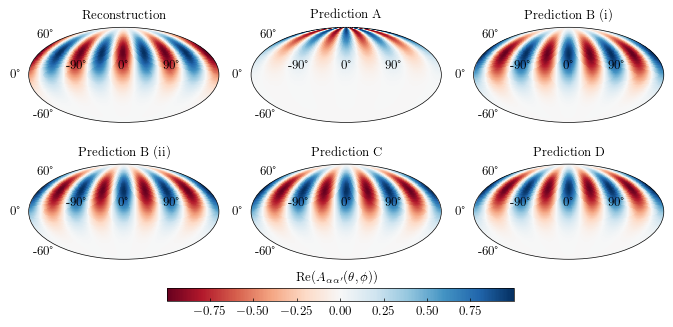

In [6]:
fig, ax = plt.subplots(figsize=(fig_width*2, fig_height*1.5), nrows = 2, ncols = 3, subplot_kw={'projection': 'mollweide'})

ax[0,0].title.set_text('Reconstruction') 
ax[0,0].pcolormesh(Lon, Lat, np.real(F), cmap=plt.cm.RdBu)
ax[0,0].set_xticks(np.radians([-90, 0, 90]))
ax[0,0].set_yticks(np.radians([-60, 0, 60]))

ax[0,1].title.set_text('Prediction A')
im3 = ax[0,1].pcolormesh(Lon, Lat, np.real(G_A), cmap=plt.cm.RdBu)
ax[0,1].set_xticks(np.radians([-90, 0, 90]))
ax[0,1].set_yticks(np.radians([-60, 0, 60]))

ax[0,2].title.set_text('Prediction B (i)')
ax[0,2].pcolormesh(Lon, Lat, np.real(G_Bi), cmap=plt.cm.RdBu)
ax[0,2].set_xticks(np.radians([-90, 0, 90]))
ax[0,2].set_yticks(np.radians([-60, 0, 60]))

ax[1,0].title.set_text('Prediction B (ii)')
ax[1,0].pcolormesh(Lon, Lat, np.real(G_Bii), cmap=plt.cm.RdBu)
ax[1,0].set_xticks(np.radians([-90, 0, 90]))
ax[1,0].set_yticks(np.radians([-60, 0, 60]))

ax[1,1].title.set_text('Prediction C')
ax[1,1].pcolormesh(Lon, Lat, np.real(G_C), cmap=plt.cm.RdBu)
ax[1,1].set_xticks(np.radians([-90, 0, 90]))
ax[1,1].set_yticks(np.radians([-60, 0, 60]))

ax[1,2].title.set_text('Prediction D')
ax[1,2].pcolormesh(Lon, Lat, np.real(G_D), cmap=plt.cm.RdBu)
ax[1,2].set_xticks(np.radians([-90, 0, 90]))
ax[1,2].set_yticks(np.radians([-60, 0, 60]))

cax = fig.add_axes([0.25, 0, 0.51, 0.04])
fig.colorbar(im3, cax=cax, orientation='horizontal')
fig.text(0.5, 0.065, r"$\mathrm{Re}(A_{\alpha \alpha '}(\theta , \phi))$", ha='center')

fig.savefig('figs/quadratic_fundamental_mapping_reconstruction.png', dpi=600, bbox_inches='tight')  
plt.show()